In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=['Calory', 'Breakfast', 'Lunch', 'Dinner', 'Exercise', 'Body_shape'])

In [ ]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']


In [ ]:
df.head()

,Calory,Breakfast,Lunch,Dinner,Exercise,Body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


In [ ]:
#Split feature vectors and labels
#X is feature vectors
X = df[['Calory', 'Breakfast', 'Lunch', 'Exercise']]

In [ ]:
X.head()

,Calory,Breakfast,Lunch,Exercise
0,1200,1,0,2
1,2800,1,1,1
2,3500,2,2,0
3,1400,0,1,3
4,5000,2,2,0


In [ ]:
Y = df[['Body_shape']]

In [ ]:
Y.head()

,Body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


In [ ]:
#rescaling feature vector to all have the same scale
from sklearn.preprocessing import StandardScaler

In [ ]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.35205803,  0.        , -1.3764944 ,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.        ]])

In [ ]:
#Covariance matrix of feature 
import numpy as np

In [ ]:
#feature are columns from X_std
features = X_std.T
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111, -0.76471911],
       [-0.93179808, -0.71721914, -0.76471911,  1.11111111]])

In [ ]:
#eigen vectors and eigen values from covarinace matrix


In [ ]:
eig_val, eig_vec = np.linalg.eig(covariance_matrix)

In [ ]:
eig_val

array([3.40707251, 0.6320974 , 0.12523738, 0.28003715])

In [ ]:
eig_vec

array([[ 0.54563488,  0.12820361, -0.82627097, -0.05588105],
       [ 0.47105496,  0.67516456,  0.38778432,  0.41458818],
       [ 0.45724034, -0.7172375 ,  0.15670999,  0.50193985],
       [-0.52088489,  0.11526934, -0.37728183,  0.75700088]])

In [ ]:
#reduce dimension to 1 dimension 
eig_val[0] / sum(eig_val)

0.7665913147253856

In [ ]:
# 1 eigenvector has 76.6% variances

In [ ]:
from sklearn import decomposition 
import seaborn as sns
import matplotlib as plt

In [ ]:
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(X_std)

In [ ]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


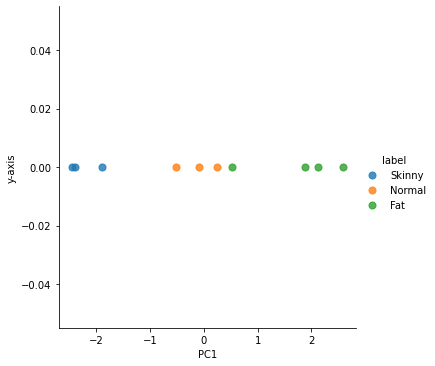

In [ ]:
sns.lmplot('PC1', 'y-axis', data = sklearn_result, fit_reg=False, scatter_kws={"s": 50}, hue="label")
